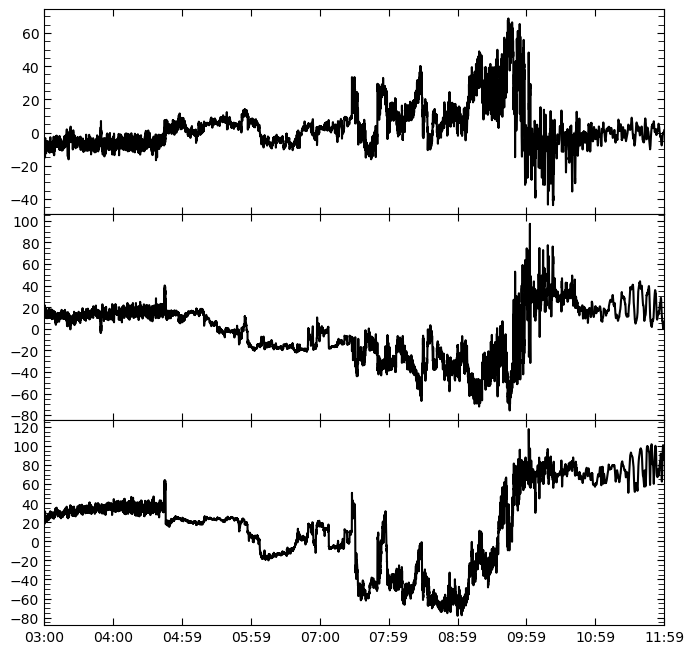

In [ ]:
# Created by Minwook Kang 2025/01/03

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# 파일 경로
file_path = "data/THE_L2_FGM_144365.txt"

# 파일 읽기
with open(file_path, "r") as f:
    lines = f.readlines()

# 주석 제거
data_lines = [line for line in lines if not line.startswith("#")]

# 시간값 및 데이터 추출
time_values = []
value_data = []

for line in data_lines[3:]:
    line_values = line.split()
    time_values.append(" ".join(line_values[:2]))  # UTC는 첫 2개의 열
    values = [float(v) if v != "NaN" else np.nan for v in line_values[2:]]
    value_data.append(values)

# DataFrame 생성 (index = Eflux_ion Rdcd 값)
fgm_data = pd.DataFrame(
    np.array(value_data),  # 데이터를 transpose하여 각 열을 시간으로 맞춤
    index=pd.to_datetime(time_values, dayfirst=True),  # 시간 값을 columns로 변환
    columns=["Bx", "By", "Bz"],  # 열 이름
)

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0)

axs[0].plot(fgm_data.index, fgm_data["Bx"], color="black")
axs[1].plot(fgm_data.index, fgm_data["By"], color="black")
axs[2].plot(fgm_data.index, fgm_data["Bz"], color="black")

num_labels = 10  # Number of xticks
times_ticks = fgm_data.index.values.astype("datetime64[ms]").tolist()
label_indices = np.round(np.linspace(0, len(times_ticks) - 1, num_labels), 0).astype(
    int
)
ticks = [pd.Timestamp(i).strftime("%H:%M") for i in times_ticks]
utc_times = [ticks[i] for i in label_indices]

for i, ax in enumerate(reversed(axs)):
    ax.tick_params(
        axis="x", which="both", bottom=True, top=True, direction="in", length=5
    )
    ax.tick_params(
        axis="y", which="both", left=True, right=True, direction="in", length=5
    )
    ax.spines["left"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.yaxis.set_ticks_position("both")  # y축 ticks 왼쪽과 오른쪽에 표시
    ax.xaxis.set_ticks_position("both")  # x축 ticks 위와 아래에 표시

    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(
        axis="y", which="minor", length=4, direction="in"
    )  # 부수 눈금 스타일

    ax.set_xticks([fgm_data.index[i] for i in label_indices])
    if i == 0:
        ax.set_xticklabels(utc_times)  # Rotate for better readability
    else:
        ax.set_xticklabels([])
    ax.set_xlim(fgm_data.index[0], fgm_data.index[-1])

plt.show()

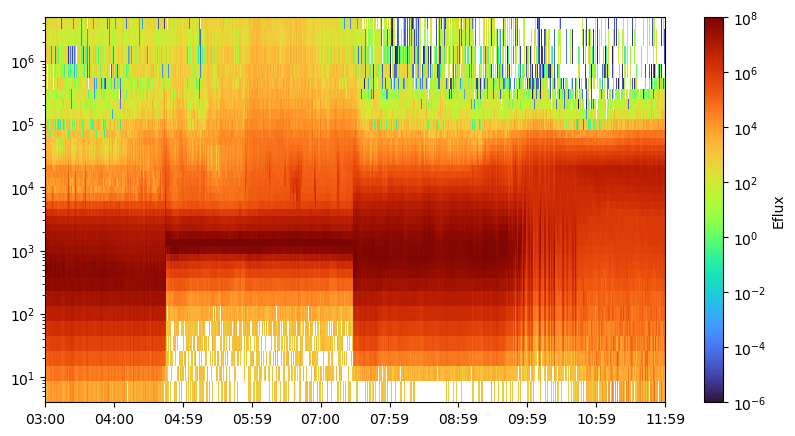

In [ ]:
# Created by Minwook Kang 2025/01/03

import re

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 파일 경로
file_path = "data/THE_L2_GMOM_144365.txt"

# 파일 읽기
with open(file_path, "r") as f:
    lines = f.readlines()

# 주석 제거
data_lines = [line for line in lines if not line.startswith("#")]

# Ion ESA-SST Energy 추출 (frequencies)
frequency_line = data_lines[1].strip()
ion_esa_sst_energy = re.findall(r"@\_~([\d\.E\+\-]+)_eV", frequency_line)
ion_esa_sst_energy = [float(val) for val in ion_esa_sst_energy]  # Float으로 변환

# 시간값 및 데이터 추출
time_values = []
value_data = []

for line in data_lines[3:]:
    line_values = line.split()
    time_values.append(" ".join(line_values[:2]))  # UTC는 첫 2개의 열
    values = [float(v) if v != "NaN" else np.nan for v in line_values[2:]]
    value_data.append(values)

# Ion ESA-SST Energy에 해당하는 주파수 데이터만 추출
value_data_cleaned = [row[: len(ion_esa_sst_energy)] for row in value_data]  # 40개 추출

# DataFrame 생성 (index = Eflux_ion Rdcd 값)
df = pd.DataFrame(
    np.array(value_data_cleaned).T,  # 데이터를 transpose하여 각 열을 시간으로 맞춤
    index=ion_esa_sst_energy,  # 첫 번째 행의 값을 index로 사용
    columns=pd.to_datetime(time_values, dayfirst=True),  # 시간 값을 columns로 변환
)

# 결과 확인
# print(df.head())

# Plotting
frequencies = df.index.values  # 주파수 값(Eflux_ion Rdcd)
times = mdates.date2num(df.columns.to_pydatetime())  # 시간 값을 숫자로 변환
freq_mesh, time_mesh = np.meshgrid(frequencies, times, indexing="ij")

# 그래프 그리기
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
pcm = axs.pcolormesh(
    time_mesh,
    freq_mesh,
    df.values.astype(float),  # 값을 float로 변환
    norm=mcolors.LogNorm(vmin=1e-6, vmax=1e8),
    shading="auto",
    cmap="turbo",
)
axs.set_yscale("log")
# Colorbar 추가
plt.colorbar(pcm, ax=axs, orientation="vertical", label="Eflux")

num_labels = 10  # Number of xticks
times_ticks = df.columns.values.astype("datetime64[ms]").tolist()
label_indices = np.round(np.linspace(0, len(times_ticks) - 1, num_labels), 0).astype(
    int
)
ticks = [pd.Timestamp(i).strftime("%H:%M") for i in times_ticks]
utc_times = [ticks[i] for i in label_indices]

axs.set_xticks([df.columns[i] for i in label_indices])
axs.set_xticklabels(utc_times)  # Rotate for better readability
axs.set_xlim(df.columns[0], df.columns[-1])

plt.show()
